In [75]:
import pandas as pd

df = pd.read_csv('train.csv')
del df['id']

df['comment_text'] = df['comment_text'].str.replace(r'[^a-zA-Z\'0-9]', ' ')
df['comment_text'] = df['comment_text'].str.replace(r'[0-9]', '')
df['comment_text'] = df['comment_text'].str.lower()


words_list_before = df['comment_text'].str.split(expand=True).unstack().value_counts()

words_list_before.to_csv('file1.csv')



/Users/j/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning:

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.



the            496879
to             297499
of             225071
and            224280
a              216958
                ...  
lele                1
twentyfirst         1
questionary         1
farhad's            1
notw                1
Length: 185840, dtype: int64


In [77]:
import numpy as np
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
data = [go.Bar(
            x = words_list_before.index.values[0:50],
            y = words_list_before.values[0:50],
            marker= dict(colorscale='Viridis',
                         color = words_list_before.values[0:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Before cleaning frequent Occuring words'
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='basic-bar')

In [13]:
pip install chart-studio

     |████████████████████████████████| 81kB 1.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



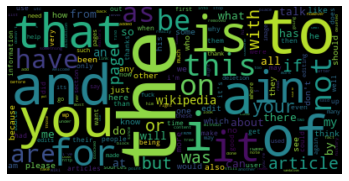

In [79]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', max_words = 100).generate_from_frequencies(words_list_before)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()